# Dimensionality Reduction and Feature Selection

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


___

## Missing Value Ratio

In this approach we first calculate the density of missing values and fill them or drop them depending on the threshold of missing values percentage that we set.

In [3]:
df_1 = df

In [4]:
df_1.isnull().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  16.734813
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.431659
Outlet_Location_Type          0.014603
Outlet_Type                   0.014603
Item_Outlet_Sales             0.014603
dtype: float64

We can observe that five columns have missing values.  
A logical step now here would be to drop the columns having missing values percentage above 20% and impute the ones having less.

In [5]:
missing_pct = df_1.isnull().sum()/len(df_1) * 100

In [6]:
drop_feat = []
for col in df_1.columns:
    if missing_pct[col] > 20:
        drop_feat.append(col)

In [7]:
df_1 = df_1.drop(drop_feat, axis= 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


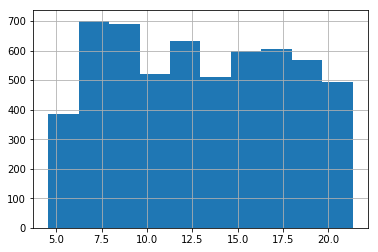

In [8]:
pd.Series.hist(df_1['Item_Weight'])
plt.show()

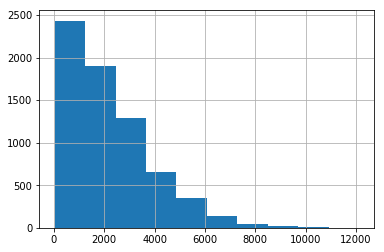

In [9]:
pd.Series.hist(df_1['Item_Outlet_Sales'])
plt.show()

In [10]:
df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean(), inplace = True)
df_1['Item_Outlet_Sales'].fillna(df_1['Item_Outlet_Sales'].median(), inplace = True)
df_1['Outlet_Type'].fillna(df_1['Outlet_Type'].value_counts()[0], inplace = True)  # replacing with most occuring value
df_1['Outlet_Location_Type'].fillna(df_1['Outlet_Location_Type'].value_counts()[0], inplace = True) # replacing with most occuring value

___

## Low Variance Filter

If a feature in our dataset contains a single type of value in all the cells then it would not be useful for either the analysis or the model. Similarly the features which have low variance should be dropped as they provide little to no information to the model.

In [11]:
df_1.isnull().sum()/len(df_1) * 100 # No Null values left

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

As observed the variance of the **Item_Visibility** is very less so we better drop this column.

In [12]:
variance_pct = df_1.var()
print(variance_pct)

Item_Weight                  1.805188e+01
Item_Visibility              2.641049e-03
Item_MRP                     3.857140e+03
Outlet_Establishment_Year    6.959394e+01
Item_Outlet_Sales            2.891304e+06
dtype: float64


In [13]:
drop_feat = []
for col in variance_pct.index:
    if variance_pct[col] <= 10:
        drop_feat.append(col)

In [14]:
df_1 = df_1.drop(drop_feat, axis = 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


___

## High Correlation

We should always remove features that are similar to any other feature in the feature set or are highly correlated as they carry similar information and including both causes multicollinearity in the model.  
However, we should keep the features which are highly correalted with the target variable.

In [15]:
df_1.drop(['Item_Outlet_Sales'], axis = 1).corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.020162,-0.004367
Item_MRP,0.020162,1.000000,0.006037
Outlet_Establishment_Year,-0.004367,0.006037,1.000000


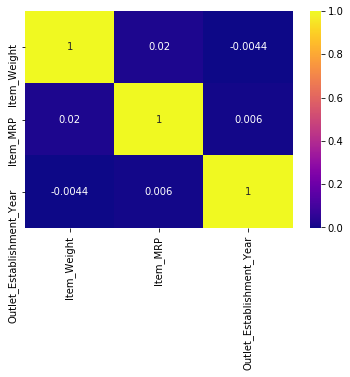

In [16]:
sns.heatmap(df_1.drop(['Item_Outlet_Sales'], axis = 1).corr(), cmap = 'plasma', annot= True)

As evident from the plot as well as the table we don;t have any correlated features.

___

## Random Forest

In [17]:
df_1 = df_1.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
df_dummmied = pd.get_dummies(df_1)
df_dummmied.drop('Item_Outlet_Sales', axis = 1, inplace = True)

In [20]:
regressor = RandomForestRegressor(max_depth= 10)


In [21]:
regressor.fit(df_dummmied, df_1['Item_Outlet_Sales'])

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Now we get the top 10 features

In [22]:
importances = regressor.feature_importances_
idx = importances.argsort()[-9:]

In [23]:
importances

array([2.25385887e-02, 5.41496127e-01, 4.31659652e-02, 3.11089976e-03,
       3.32383797e-03, 2.13179677e-03, 1.13373124e-03, 1.53515152e-03,
       2.57710112e-03, 1.84141970e-03, 1.29840349e-03, 1.88290690e-03,
       4.79499736e-03, 2.13965075e-03, 4.73609018e-03, 2.12735467e-03,
       1.41478622e-03, 3.04785361e-03, 1.69024961e-03, 3.76124555e-04,
       1.72033887e-03, 3.60358860e-03, 2.71054758e-03, 2.14781754e-03,
       0.00000000e+00, 1.23174202e-03, 1.74602509e-03, 2.02984473e-03,
       0.00000000e+00, 2.66379406e-01, 2.19631123e-03, 1.21553665e-03,
       6.86558057e-02])

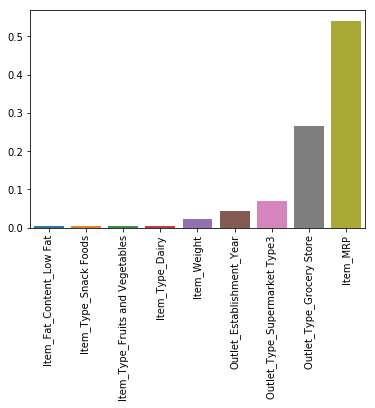

In [24]:
fig = sns.barplot(x = df_dummmied.T.iloc[idx].index, y = importances[idx])
# plt.xticks(rotation = 'vertical')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

Now we can either pick ourselves the features that show most importance or alternatively we can use the function **SelectFromModel** to let it pick them features from the model itself.

In [25]:
from sklearn.feature_selection import SelectFromModel

In [26]:
feature = SelectFromModel(regressor)

In [27]:
feature.fit_transform(df_dummmied, df_1['Item_Outlet_Sales'])

array([[2.498092e+02, 1.999000e+03, 0.000000e+00, 0.000000e+00],
       [4.826920e+01, 2.009000e+03, 0.000000e+00, 0.000000e+00],
       [1.416180e+02, 1.999000e+03, 0.000000e+00, 0.000000e+00],
       ...,
       [2.169824e+02, 1.999000e+03, 0.000000e+00, 0.000000e+00],
       [1.791344e+02, 1.985000e+03, 0.000000e+00, 1.000000e+00],
       [1.541998e+02, 2.007000e+03, 0.000000e+00, 0.000000e+00]])

___

## Backward Elimination

The Backward elimination is a well known procedure for feature selection. It includes the following steps:  
* Fit the model selecting all the features  
* Measure the significance of each of the feature and select a threshold
* Remove the features with greater p-value then threshold
* Fit the model
* Repeat the process

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [29]:
l_regressor = LinearRegression()
rfe = RFE(l_regressor, 4)

In [30]:
rfe.fit_transform(df_dummmied, df_1['Item_Outlet_Sales'])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

There's another more manual method of Backward elimination found [here](https://github.com/hashbanger/Machine_Learning_Implementations/blob/master/SciKit_Implementations/MultipleRegression/mR_with_BackElim.py)

___

## Forward Feature Selection

Sequential feature selection proceeds as:  
* Start with a constant model, $M0$
* Try all models $M1$ consisting of just one feature and pick the best according to the F statistic
* Try all models $M2$ consisting of $M1$ plus one other feature and pick the best ...

Know in depth about f_regression and r2 based selection [here](https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2)

Know about F-Statistic and P-Value [here](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/)

In [31]:
from sklearn.feature_selection import f_regression

In [32]:
f_reg = f_regression(df_dummmied, df_1['Item_Outlet_Sales'])
f_reg 

(array([2.50293355e-01, 3.33006750e+03, 2.04259100e+01, 1.45733727e+00,
        2.50397156e+00, 6.59161095e+00, 1.30246960e-01, 2.14014355e+00,
        1.30469376e+01, 1.59707547e-02, 1.54148818e+00, 1.39317189e+00,
        9.33315915e-01, 1.05988377e+00, 8.14142179e+00, 2.76179152e-02,
        2.90523927e+00, 3.05866905e-02, 7.23575931e-01, 3.96338718e+00,
        2.68515733e-02, 4.70717333e+00, 2.82695836e+00, 3.35918416e+00,
        5.30032720e-02, 7.88823671e+01, 2.50617175e+01, 1.07487517e+01,
        5.30032720e-02, 1.36851894e+03, 8.45124840e+01, 1.24284105e+01,
        7.07381500e+02]),
 array([6.16884674e-001, 0.00000000e+000, 6.30267755e-006, 2.27395972e-001,
        1.13605790e-001, 1.02670842e-002, 7.18187255e-001, 1.43534371e-001,
        3.05956861e-004, 8.99438445e-001, 2.14438964e-001, 2.37911181e-001,
        3.34036892e-001, 3.03278065e-001, 4.33951360e-003, 8.68015180e-001,
        8.83375252e-002, 8.61170839e-001, 3.95003187e-001, 4.65397337e-002,
        8.69842654

The f_regression gives out the F-statistic along with their P-values. We will now select the features with F-Statistic greater than 10.

In [33]:
feats = np.argwhere(f_reg[0] > 10)
feats.flatten()

array([ 1,  2,  8, 25, 26, 27, 29, 30, 31, 32], dtype=int64)

In [34]:
df_dummmied.iloc[:, feats.flatten()].head()

,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,1,0,0
1,48.2692,2009,0,0,0,1,0,0,1,0
2,141.6180,1999,0,1,0,0,0,1,0,0
3,182.0950,1998,0,0,0,1,1,0,0,0
4,53.8614,1987,0,0,0,1,0,1,0,0


So we have got our best features based on the sequential selection procedure.

___

### Import data

In [35]:
import cv2
from glob import glob
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
train_mnist, test_mnist = fashion_mnist.load_data()

Using TensorFlow backend.


In [36]:
print("Train Images length {}\nTrain Labels {}".format(len(train_mnist[0]), len(train_mnist[1])))
print("\nTest Images length {}\nTest Labels {}".format(len(test_mnist[0]), len(test_mnist[1])))

Train Images length 60000
Train Labels 60000

Test Images length 10000
Test Labels 10000


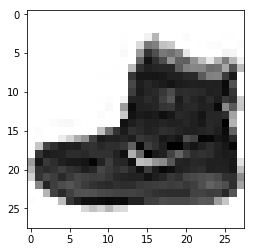

In [37]:
plt.imshow(train_mnist[0][0], cmap = plt.cm.binary)
plt.show()

Since functions of our use require 1 dimensional arrays for each image, we have to flatten the images from 28*28 to 784

In [38]:
train_images = []
for i in range(0,60000):
    img = train_mnist[0][i].flatten()
    train_images.append(img)
train_images = np.array(train_images)

In [39]:
train_images.shape

(60000, 784)

In [40]:
feat_cols = ["pixel"+str(i) for i in range(train_images.shape[1])] # generating Columnns

In [41]:
df_mnist = pd.DataFrame(train_images, columns = feat_cols)
df_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___

## Factor Analysis

Factor analysis is a useful tool for investigating variable relationships for complex concepts. It allows researchers to investigate concepts that are not easily measured directly by collapsing a large number of variables into a few interpretable underlying factors. The key concept of factor analysis is that multiple observed variables have similar patterns of responses because they are all associated with a latent (i.e. not directly measured) variable.  

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor.

Decomposing the dataset using Factor Analysis

In [42]:
from sklearn.decomposition import FactorAnalysis

In [43]:
FA = FactorAnalysis(n_components= 3).fit_transform(df_mnist[feat_cols].values)

In [44]:
FA.shape

(60000, 3)

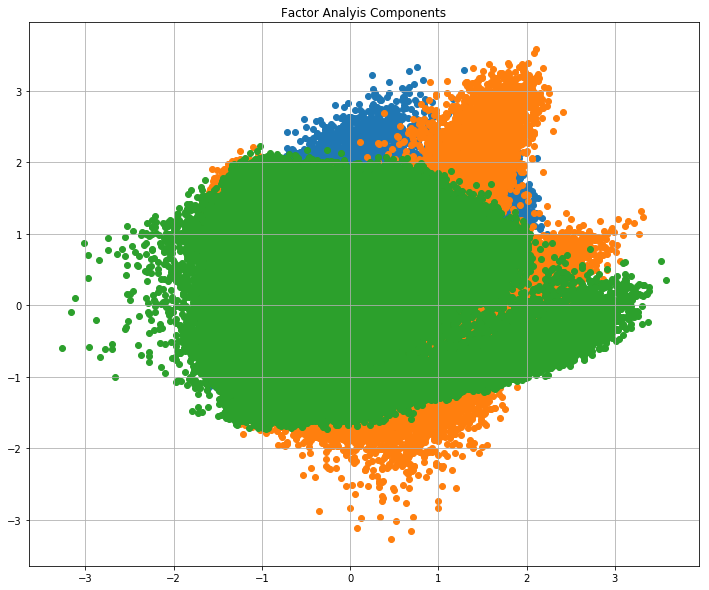

In [45]:
plt.figure(figsize=(12,10))
plt.scatter(FA[:, 0], FA[:, 1])
plt.scatter(FA[:, 1], FA[:, 2])
plt.scatter(FA[:, 2], FA[:, 0])
plt.title('Factor Analyis Components')
plt.grid()
plt.show()

We can see all the different factors in the above graph. Here, the x-axis and y-axis represent the values of decomposed factors. As I mentioned earlier, it is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfully.

___

## Principal Component Analysis

Principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

* A principal component is a linear combination of the original variables
* Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset
* Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component
* Third principal component tries to explain the variance which is not explained by the first two principal components and so on

![img](https://i.stack.imgur.com/Q7HIP.gif)

Let's plot some random images from the dataset

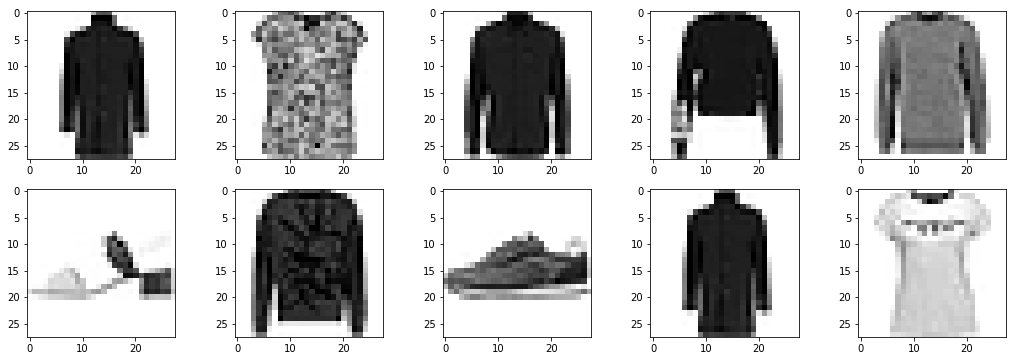

In [46]:
plt.figure(figsize= (18,6))
for i,img in enumerate(np.abs(np.random.randn(10) * 100)):
    plt.subplot(2,5,i+1)
    plt.imshow(train_mnist[0][int(img)], cmap = plt.cm.binary)
plt.show()

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components= 4)
pca_res = pca.fit_transform(df_mnist[feat_cols].values)

The **pca.explained_variance_ratio_** parameter returns a vector of the variance explained by each dimension.  
Thus **pca.explained_variance_ratio_[i]** gives the variance explained solely by the $i+1$st dimension.
  
**pca.explained_variance_ratio_.cumsum()** returns a vector x such that $x[i]$ returns the cumulative variance explained by the first $i+1$ dimensions.

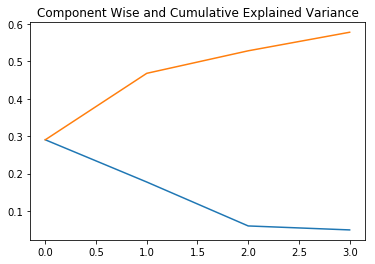

In [49]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), pca.explained_variance_ratio_.cumsum())
plt.title('Component Wise and Cumulative Explained Variance')
plt.show()

As observed from the plot our 4 components would cover about 57% of the variance in the data.

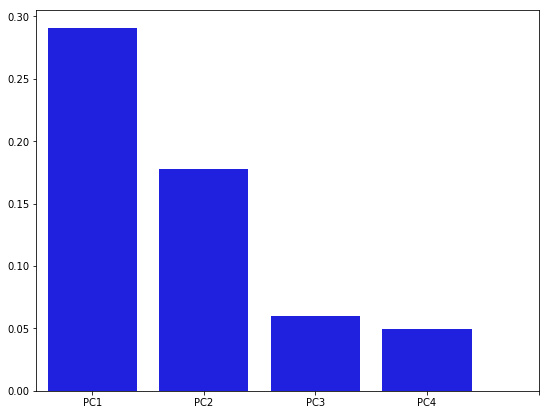

[0.29039228 0.1775531  0.06019222 0.04957428]
[0.29039228 0.46794538 0.5281376  0.57771188]


In [50]:
plt.figure(figsize=(9,7))
sns.barplot([1,2,3,4], pca.explained_variance_ratio_, color= 'blue')
plt.xticks([0,1,2,3,4], ['PC1','PC2','PC3','PC4'])
plt.show()
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

We can see the values that each component covers as well as visualize it below.

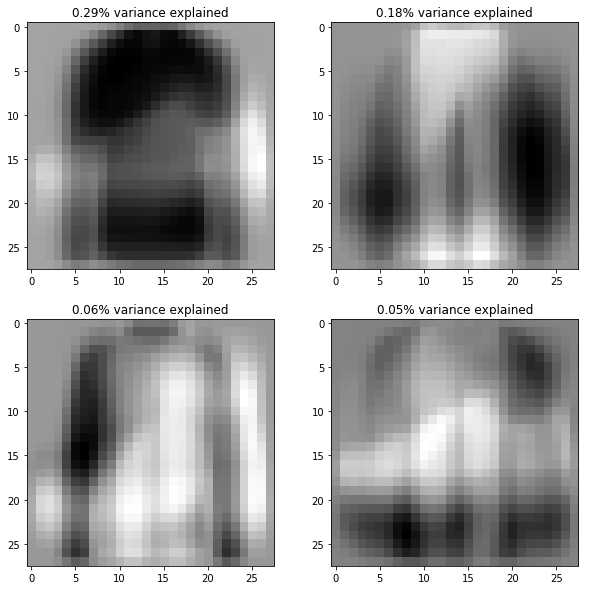

In [51]:
plt.figure(figsize=(10,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(pca.components_[i, :].reshape(28,28), cmap = plt.cm.binary)
    plt.title('{:.2f}% variance explained'.format(pca.explained_variance_ratio_[i]))
plt.show()

We can see that our first component individually covers the most variance in the data and it reduces as we go on.

## Singular Value Decomposition

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices.  
For in depth knowledge refer [this](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8)

In [52]:
from sklearn.decomposition import TruncatedSVD

In [53]:
svd = TruncatedSVD(n_components=3, random_state= 101).fit_transform(df_mnist[feat_cols].values)

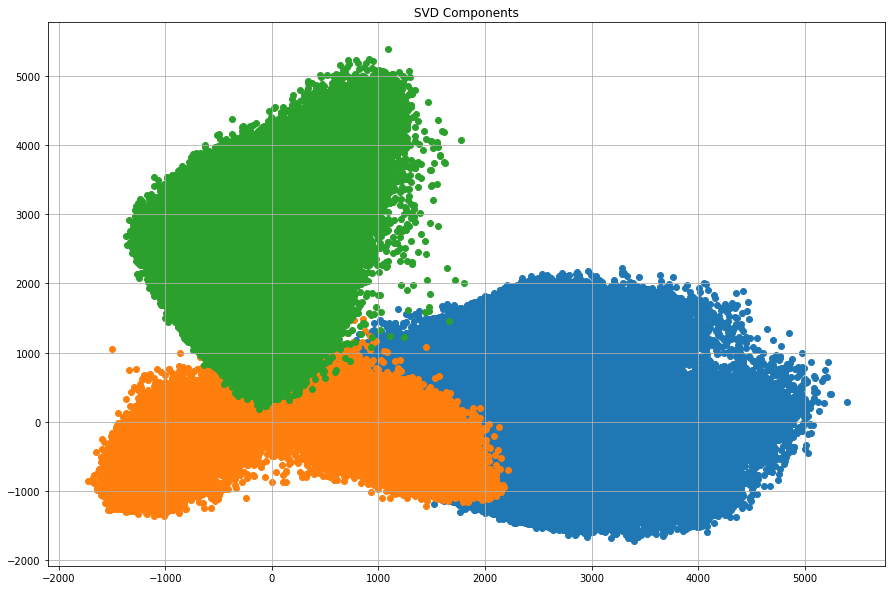

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(svd[:, 0], svd[:, 1])
plt.scatter(svd[:, 1], svd[:, 2])
plt.scatter(svd[:, 2], svd[:, 0])
plt.title('SVD Components')
plt.grid()
plt.show()

___

## Independent Component Analysis

Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables.  
for example:  

$Y=X^2$  
the two variables are uncorrelated but dependent.  
For detailed difference refer [here](http://compneurosci.com/wiki/images/4/42/Intro_to_PCA_and_ICA.pdf)

![pcaVica](https://media.springernature.com/original/springer-static/image/art%3A10.1007%2Fs12517-017-3090-1/MediaObjects/12517_2017_3090_Fig1_HTML.gif)

The equation of PCA is $x = Wχ$.

Here,

$x$ is the observations  
$W$ is the mixing matrix  
$χ$ is the source or the independent components  
  
Now we have to find an un-mixing matrix such that the components become as independent as possible. Most common method to measure independence of components is Non-Gaussianity:

As per the central limit theorem, distribution of the sum of independent components tends to be normally distributed (Gaussian).

So we can look for the transformations that maximize the kurtosis of each component of the independent components. Kurtosis is the third order moment of the distribution.  
Maximizing the kurtosis will make the distribution non-gaussian and hence we will get independent components.

In [55]:
from sklearn.decomposition import FastICA

In [56]:
ica = FastICA(n_components= 3, random_state= 101)
x = ica.fit_transform(df_mnist[feat_cols].values)

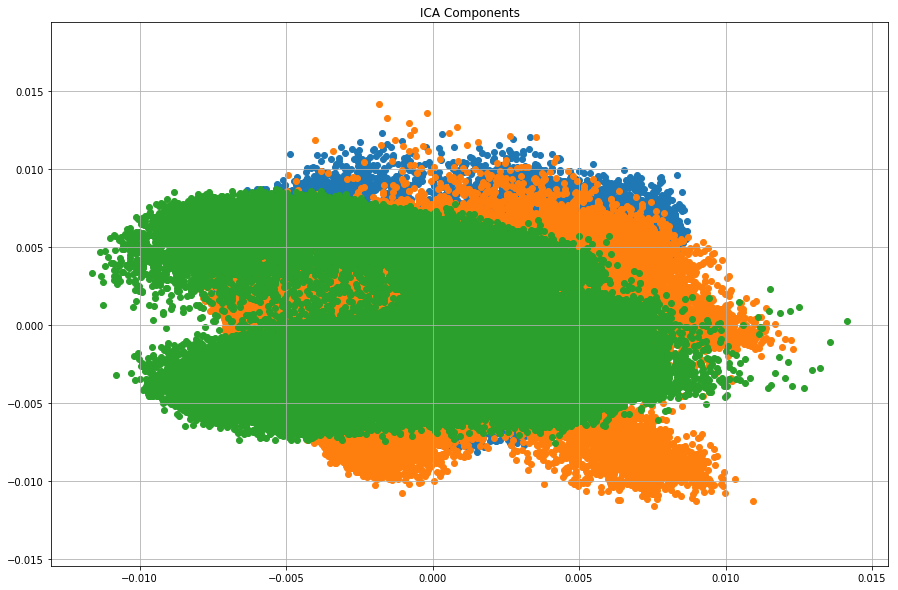

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(x[:, 1], x[:, 2])
plt.scatter(x[:, 2], x[:, 0])
plt.title('ICA Components')
plt.grid()
plt.show()

The data has been separated into different independent components which can be seen very clearly in the above image. X-axis and Y-axis represent the value of decomposed independent components.

___

## Methods based on Projections

First of all, what are vector projections? Consider the two vectors below:  
![vectors](illustrations_used/pro1.png)
We want to find the projection of a on b. Let the angle between a and b be ∅. The projection (a1) will look like:
![vectors2](illustrations_used/pro2.png)
a1 is the vector parallel to b. So, we can get the projection of vector a on vector b using the below equation:
![vectors3](illustrations_used/pro3.png)


By projecting one vector onto the other, dimensionality can be reduced.   
In projection techniques, multi-dimensional data is represented by projecting its points onto a lower-dimensional space.  

There are different methods of projections:  
* Projection onto interesting directions:
    - Interesting directions depend on specific problems but generally, directions in which the projected values are non-gaussian are considered to be interesting
    - Similar to ICA (Independent Component Analysis), projection looks for directions maximizing the kurtosis of the projected values as a measure of non-gaussianity  
    
Once upon a time, it was assumed that the Earth was flat. No matter where you go on Earth, it keeps looking flat (let’s ignore the mountains for a while). But if you keep walking in one direction, you will end up where you started. That wouldn’t happen if the Earth was flat. The Earth only looks flat because we are minuscule as compared to the size of the Earth.  
  
These small portions where the Earth looks flat are manifolds, and if we combine all these manifolds we get a large scale view of the Earth, i.e., original data. Similarly for an n-dimensional curve, small flat pieces are manifolds and a combination of these manifolds will give us the original n-dimensional curve. Let us look at the steps for projection onto manifolds:  
  
* We first look for a manifold that is close to the data
* Then project the data onto that manifold
* Finally for representation, we unfold the manifold
* There are various techniques to get the manifold, and all of these techniques consist of a three-step approach:
    * Collecting information from each data point to construct a graph having data points as vertices
    * Transforming the above generated graph into suitable input for embedding steps
    * Computing an (*n x n*) eigen equation
    
    
Let us understand manifold projection technique with an example.

If a manifold is continuously differentiable to any order, it is known as smooth or differentiable manifold. ISOMAP is an algorithm which aims to recover full low-dimensional representation of a non-linear manifold. It assumes that the manifold is smooth.

It also assumes that for any pair of points on manifold, the geodesic distance (shortest distance between two points on a curved surface) between the two points is equal to the Euclidean distance (shortest distance between two points on a straight line).  
Let’s first visualize the geodesic and Euclidean distance between a pair of points:

![manifold](illustrations_used/manifold.png)

Here,
  
Dn1n2 = geodesic distance between X1 and X2  
dn1n2 = Euclidean distance between X1 and X2 

**ISOMAP** assumes both of these distances to be equal. Let’s now look at a more detailed explanation of this technique. As mentioned earlier, all these techniques work on a three-step approach. We will look at each of these steps in detail:  
  
Neighborhood Graph:  
First step is to calculate the distance between all pairs of data points:  
$d_{ij} = d_{χ}(x_{i},x_{j}) = || x_{i}-x_{j} || χ$  

Here,

$dχ(x_{i},x_{j})$ = geodesic distance between $x_{i}$ and $x_{j}$  
$|| x_{i}-x_{j}) ||$ = Euclidean distance between $x_{i}$ and $x_{j}$  
    
After calculating the distance, we determine which data points are neighbors of manifold.  
Finally the neighborhood graph is generated: G=G(V,ℰ),  
where the set of vertices $V = {x1, x2,…., xn}$ are input data points and  
set of edges $ℰ =$ {$e_{ij}$} indicate neighborhood relationship between the points.  
  
Compute Graph Distances:  
Now we calculate the geodesic distance between pairs of points in manifold by graph distances
Graph distance is the shortest path distance between all pairs of points in graph G.  

Embedding:  
Once we have the distances, we form a symmetric *(n x n)* matrix of squared graph distance   
Now we choose embedding vectors to minimize the difference between geodesic distance and graph distance  

Finally, the graph G is embedded into Y by the *(t x n)* matrix.

In [62]:
from sklearn.manifold import Isomap

We limit the fitting to only 6000 observations to save time 

In [63]:
iso = Isomap(n_neighbors= 5, n_components= 3, n_jobs= -1)
iso_res = iso.fit_transform(df_mnist[feat_cols][:6000].values)

Now we visualize the transformed data

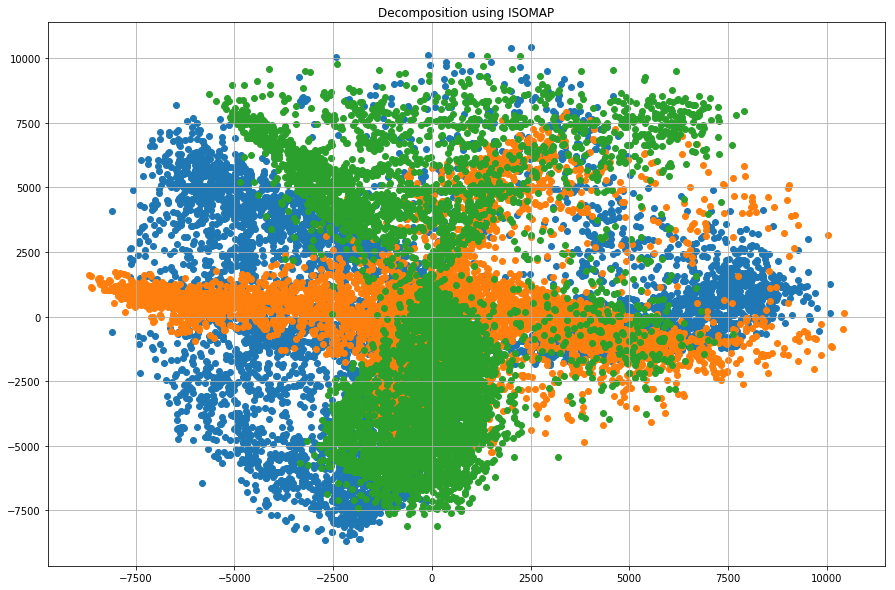

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(iso_res[:, 0], iso_res[:, 1])
plt.scatter(iso_res[:, 1], iso_res[:, 2])
plt.scatter(iso_res[:, 2], iso_res[:, 0])
plt.title('Decomposition using ISOMAP')
plt.grid()
plt.show()

___

## t-SNE

PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables.  
What if we can easily search for patterns in a non-linear way? t-SNE is one such technique.  
* There are mainly two types of approaches we can use to map the data points:  
    * Local approaches :  They maps nearby points on the manifold to nearby points in the low dimensional representation.
    * Global approaches : They attempt to preserve geometry at all scales, i.e. mapping nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points.  
     
  
* t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time
* It calculates the probability similarity of points in high dimensional space as well as in low dimensional space
* High-dimensional Euclidean distances between data points are converted into conditional probabilities that represent similarities:   
![form1](illustrations_used/formula1.png)
$x_{i}$ and $x_{j}$ are data points, $||x_{i}-x_{j}||$ represents the Euclidean distance between these data points, and 𝛔i is the variance of data points in high dimensional space
* For the low-dimensional data points $y_{i}$ and $y_{j}$ corresponding to the high-dimensional data points $y_{i}$ and $y_{j}$, it is possible to compute a similar conditional probability using:  
![form2](illustrations_used/formula2.png)
where $||y_{i} - y_{j}||$ represents the Euclidean distance between $y_{i}$ and $y_{j}$
* After calculating both the probabilities, it minimizes the difference between both the probabilities

In [72]:
from sklearn.manifold import TSNE

In [74]:
tsne_res = TSNE(n_components= 3, n_iter= 300).fit_transform(df_mnist[feat_cols][:6000].values)

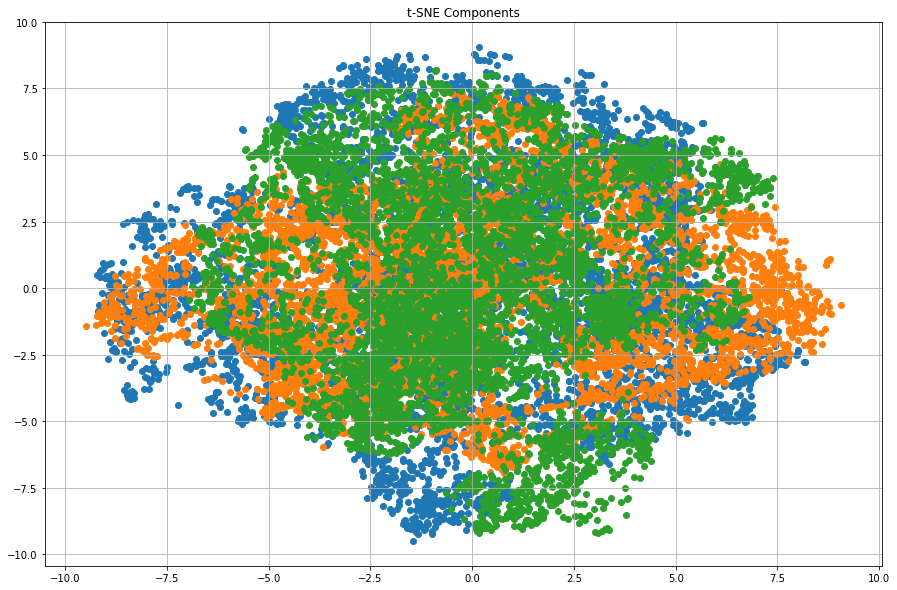

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1])
plt.scatter(tsne_res[:, 1], tsne_res[:, 2])
plt.scatter(tsne_res[:, 2], tsne_res[:, 0])
plt.title('t-SNE Components')
plt.grid()
plt.show()

___

## UMAP

t-SNE works very well on large datasets but it also has it’s limitations, such as loss of large-scale information, slow computation time, and inability to meaningfully represent very large datasets. **Uniform Manifold Approximation and Projection** (UMAP) is a dimension reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime.  

Some of the key advantages of UMAP are:  

* It can handle large datasets and high dimensional data without too much difficulty
* It combines the power of visualization with the ability to reduce the dimensions of the data
* Along with preserving the local structure, it also preserves the global structure of the data. UMAP maps nearby points on the manifold to nearby points in the low dimensional representation, and does the same for far away points  

This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional space, projects them onto the low dimensional space, and calculates the distance between points in this low dimensional space. It then uses Stochastic Gradient Descent to minimize the difference between these distances.

In [76]:
import umap

In [77]:
umap_res = umap.UMAP(n_neighbors= 5, n_components= 3, min_dist= 0.3).fit_transform(df_mnist[feat_cols][:6000].values)

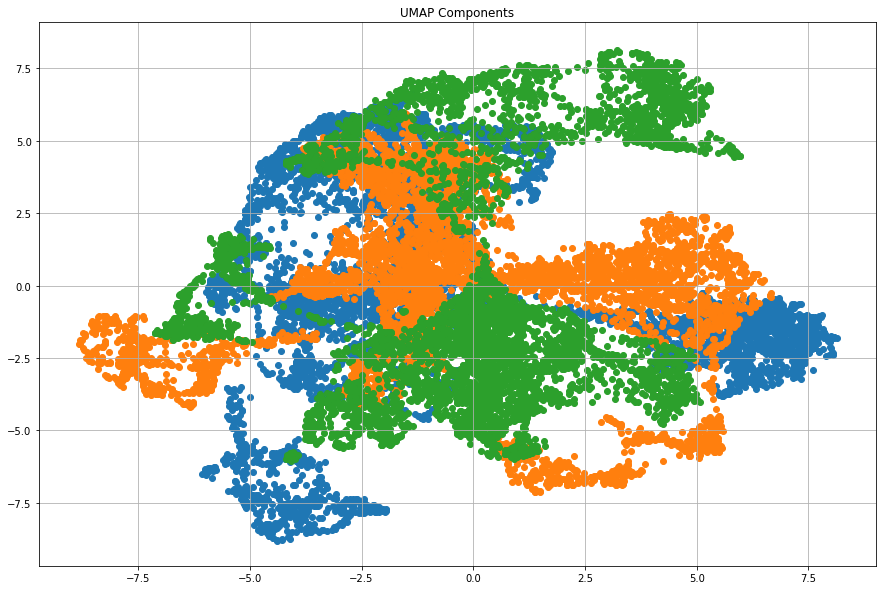

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(umap_res[:, 0], umap_res[:, 1])
plt.scatter(umap_res[:, 1], umap_res[:, 2])
plt.scatter(umap_res[:, 2], umap_res[:, 0])
plt.title('UMAP Components')
plt.grid()
plt.show()

The correlation between the components obtained from UMAP is quite less as compared to the correlation between the components obtained from t-SNE, hence the UMAP tends to perform better.

___

### End Views

* **Missing Value Ratio**: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them    


* **Low Variance filter**: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped   


* **High Correlation filter**: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly  


* **Random Forest**: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction  


* Both **Backward Feature Elimination** and **Forward Feature Selection techniques** take a lot of computational time and are thus generally used on smaller datasets  


* **Factor Analysis**: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor  


* **Principal Component Analysis**: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible  


* **Independent Component Analysis**: We can use ICA to transform the data into independent components which describe the data using less number of components  


* **ISOMAP**: We use this technique when the data is strongly non-linear  


* **t-SNE**: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well  


* **UMAP**: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE  

___

#### References:  
[AnalyticsVidhya](https://www.analyticsvidhya.com)  
[StackExchange](https://www.stackexchange.com)  
[StackOverflow](https://www.stackoverflow.com)  
[Medium](https://www.medium.com)  

### *de nada!*